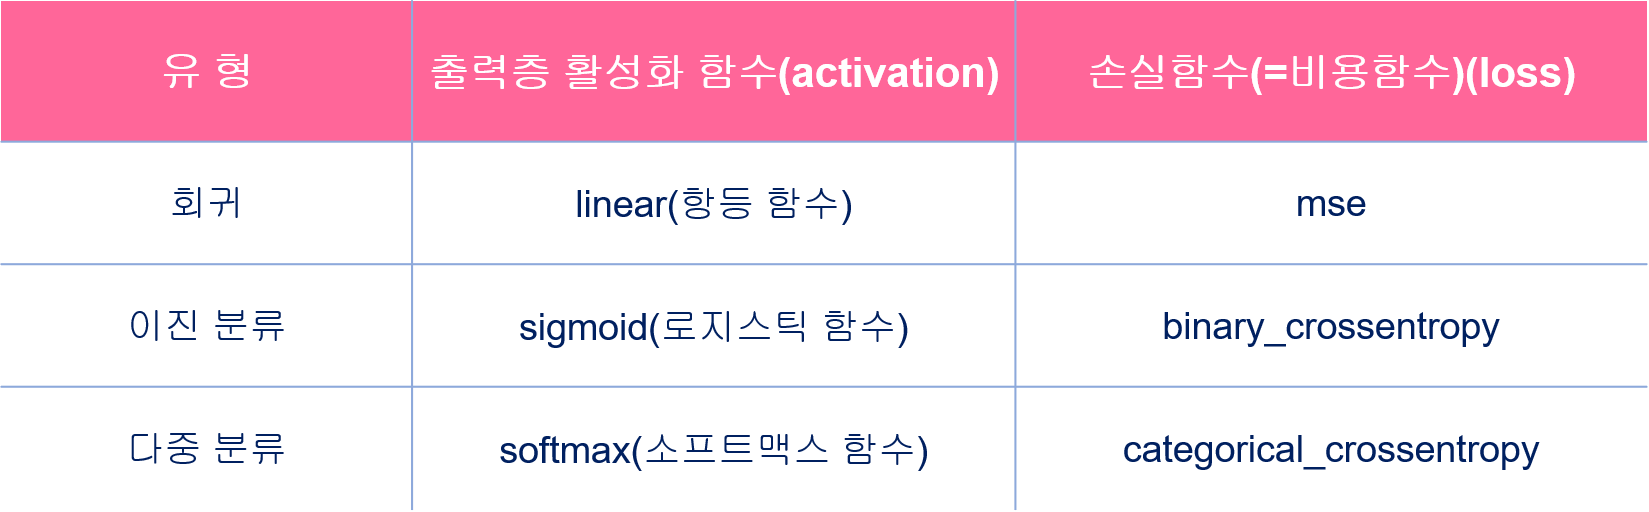

### 목표
- 환자 데이터를 바탕으로 유방암 유무 판단
- 딥러닝으로 이진분류 진행
- sklearn.datasets 제공하는 load_breast_cancer사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
data.keys()
# data : 문제데이터
# target: 답지데이터
# target_names : 답지데이터 이름
# feature_names : 문제데이터 이름

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
data['filename']
# data.filename

'breast_cancer.csv'

In [4]:
# 답지데이터 컬럼이름
data['target_names']
# 0 - malignant 악성
# 1 - benign 양성
# 클래스가(답지) 2개

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data['target'] # 답지 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
# 문제데이터
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
# 문제와 답지로 분리
X = data['data'] # 문제데이터
y = data['target'] # 답지데이터

In [8]:
# train,test set split (8:2)
from sklearn.model_selection import train_test_split
# train_test_split(문제,답지,분리비율(test_size), 랜덤규칙고정값설정)
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state= 42
)

In [9]:
# 데이터 크기 확인 shape()
print('X_train 문제 ', X_train.shape)
print('X_test 문제', X_test.shape)
print('y_train 답지', y_train.shape)
print('y_test 답지', y_test.shape)

X_train 문제  (455, 30)
X_test 문제 (114, 30)
y_train 답지 (455,)
y_test 답지 (114,)


### 모델링 설계
- 1. 신경망 모델 구조 설계
 - 3층구조로 설계(중간층 3개 구성)
- 2. 신경망 모델 학습방법 및 평가방법 설정
- 3. 모델 학습 및 학습결과 시각화
- 4. 모델 예측 및 평가

In [11]:
# tensorflow 도구 불러오기
from tensorflow.keras.models import Sequential # 뼈대 생성
from tensorflow.keras.layers import InputLayer, Dense, Activation
# 신경망 구성요소(조립)
# Sequential:뼈대(틀)
# InputLayer:입력층
# Dense : 중간층의 밀집도 설정
# Activation : 활성화 함수(값을 넘길지 말지 판단하는 함수)

In [13]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()
# 입력층
model.add(InputLayer(input_shape=(30,)))
# 입력데이터의 형태를 결정 / 입력 특성의 개수를 입력

# 중간층(은닉층, 히든레이어)
model.add(Dense(units=8, activation='relu')) # 뉴련(선형모델) 8개 연결
# model.add(Dense(units=8)) # 뉴련(선형모델) 8개 연결
# model.add(Activation('relu')) # 활성화 함수
model.add(Dense(units=16, activation='relu')) # 뉴련(선형모델) 16개 연결
model.add(Dense(units=32, activation='relu')) # 뉴련(선형모델) 32개 연결
# 출력층
model.add(Dense(units=1, activation='sigmoid'))
# 성적데이터 : 연속형(시퀀셜)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 969 (3.79 KB)
Trainable params: 969 (3.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(
    #loss='mse',
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc'] # 평균제곱오차
)

In [16]:
h1 = model.fit(X_train,y_train, validation_split=0.2, epochs=50)

Epoch 1/50
12/12 [==============================] - 2s 26ms/step - loss: 18.8277 - acc: 0.3736 - val_loss: 6.9941 - val_acc: 0.3626
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 3.8061 - acc: 0.5110 - val_loss: 1.6443 - val_acc: 0.3516
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 1.9833 - acc: 0.4396 - val_loss: 1.7450 - val_acc: 0.6703
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 1.2485 - acc: 0.5852 - val_loss: 0.5674 - val_acc: 0.7363
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5982 - acc: 0.7170 - val_loss: 0.5532 - val_acc: 0.7802
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.4031 - acc: 0.8407 - val_loss: 0.4270 - val_acc: 0.8022
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3722 - acc: 0.8297 - val_loss: 0.3946 - val_acc: 0.8352
Epoch 8/50
12/12 [==============================] - 0s 7ms/step - loss: 0.3757 - acc: 0.

In [19]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 12ms/step - loss: 0.1843 - acc: 0.9386


[0.1843007355928421, 0.9385964870452881]

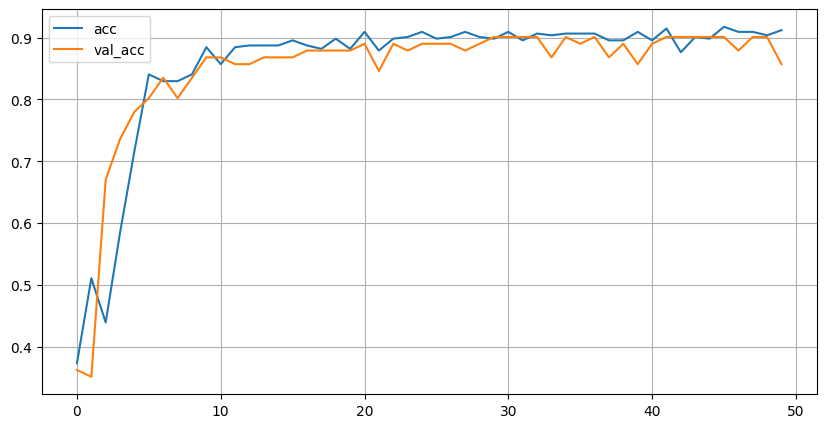

In [21]:
# 학습결과 시각화
# figsize 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(h1.history['acc'], label='acc')
plt.plot(h1.history['val_acc'], label='val_acc')
plt.grid() # 격자무늬
plt.legend() # 범례

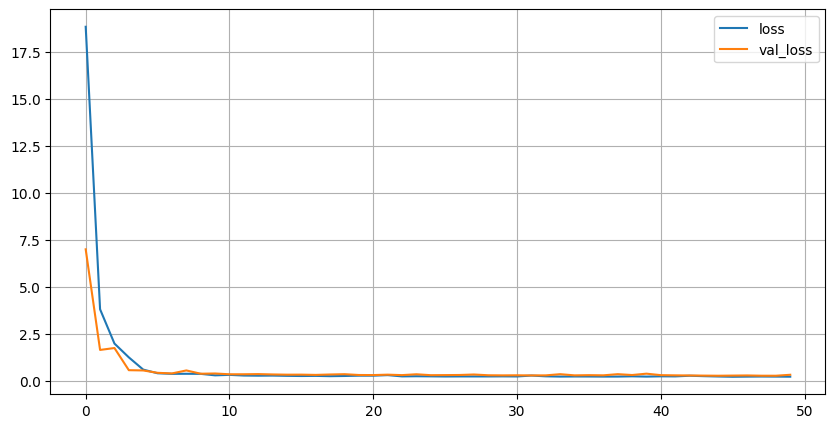

In [22]:
# 학습결과 시각화
# figsize 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(h1.history['loss'], label='loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.grid() # 격자무늬
plt.legend() # 범례

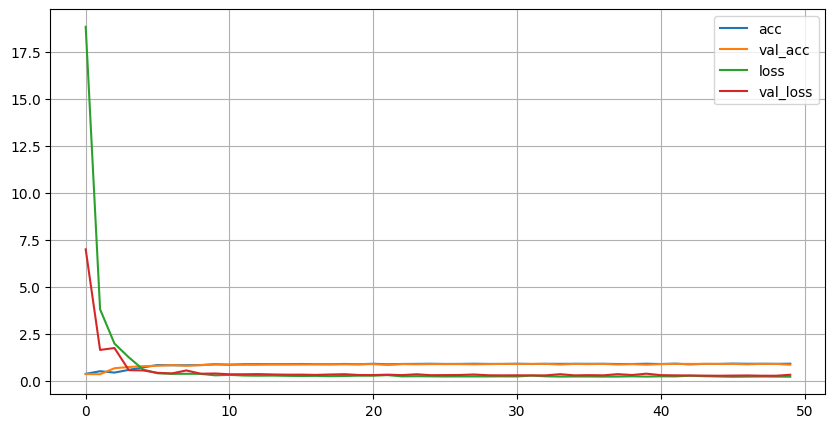

In [23]:
# 학습결과 시각화
# figsize 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(h1.history['acc'], label='acc')
plt.plot(h1.history['val_acc'], label='val_acc')
plt.plot(h1.history['loss'], label='loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.grid() # 격자무늬
plt.legend() # 범례